In [5]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets\test'

In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


In [9]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
# useful for getting number of output classes
folders = glob('./../Datasets/train/*')

In [11]:
folders

['./../Datasets/train\\Black Scurf',
 './../Datasets/train\\Blackleg',
 './../Datasets/train\\Common Scab',
 './../Datasets/train\\Dry Rot',
 './../Datasets/train\\Healthy Potatoes',
 './../Datasets/train\\Miscellaneous',
 './../Datasets/train\\Pink Rot']

In [12]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./../Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 46 images belonging to 7 classes.


In [21]:
test_set = test_datagen.flow_from_directory('./../Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 46 images belonging to 7 classes.


In [22]:
import scipy
from scipy import interpolate
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 12s/step - accuracy: 0.1639 - loss: 3.0986 - val_accuracy: 0.2174 - val_loss: 12.9974
Epoch 2/50


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.1201 - loss: 14.7721 - val_accuracy: 0.1957 - val_loss: 17.3508
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.1390 - loss: 16.8415 - val_accuracy: 0.1522 - val_loss: 14.1792
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.1327 - loss: 13.7572 - val_accuracy: 0.1957 - val_loss: 6.0036
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 7s/step - accuracy: 0.1439 - loss: 6.8031 - val_accuracy: 0.2174 - val_loss: 5.5252
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accurac

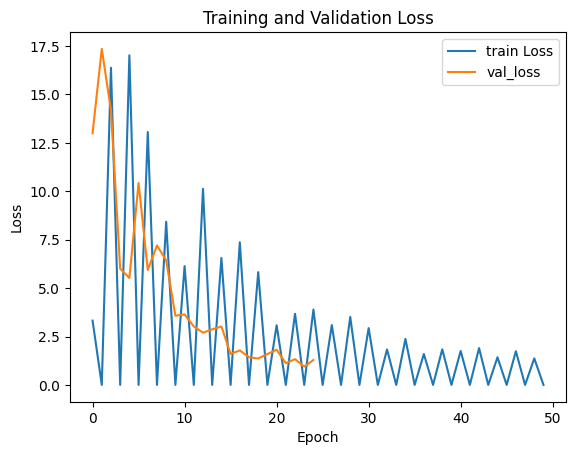

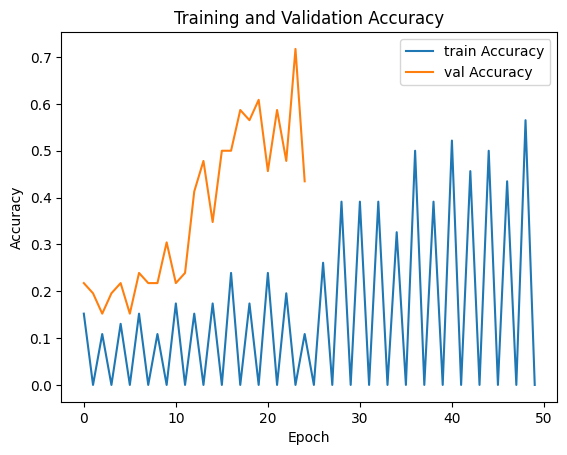

In [23]:
## plot the loss


plt.plot(r.history['loss'], label='train Loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('./../Images/loss_plot_model1.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(r.history['accuracy'], label='train Accuracy')
plt.plot(r.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('./../Images/accuracy_plot_model1.png')
plt.show()

In [24]:
y_pred=model.predict(test_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step


In [25]:
y_pred

array([[1.57793000e-01, 7.98643902e-02, 3.16661209e-01, 4.20797348e-01,
        1.31123178e-02, 3.23112676e-04, 1.14485947e-02],
       [1.26671270e-01, 1.03570424e-01, 1.79089189e-01, 3.26575965e-01,
        3.12545821e-02, 8.09660777e-02, 1.51872501e-01],
       [1.66351959e-01, 5.92480265e-02, 2.86985099e-01, 3.98523688e-01,
        3.95667367e-02, 1.34222656e-02, 3.59021761e-02],
       [2.05075219e-01, 1.67662874e-01, 9.71235931e-02, 5.06135285e-01,
        1.80511631e-03, 2.72129226e-04, 2.19258182e-02],
       [4.81256330e-03, 1.73797414e-01, 1.89573560e-02, 5.41595519e-01,
        2.33068509e-04, 2.25033709e-05, 2.60581523e-01],
       [6.88053959e-04, 1.66330207e-02, 6.72047019e-01, 3.07166606e-01,
        8.51103414e-06, 1.83413071e-08, 3.45679303e-03],
       [5.02400915e-04, 7.53439367e-01, 9.01606958e-03, 2.36732721e-01,
        2.62119836e-04, 6.76192258e-08, 4.72109386e-05],
       [6.81452900e-02, 4.33016568e-02, 4.28435862e-01, 4.45197016e-01,
        2.59472430e-03, 1

In [26]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [27]:
y_pred

array([3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3,
       3, 5, 3, 0, 1, 3, 3, 3, 2, 3, 1, 3, 6, 2, 3, 3, 2, 6, 3, 3, 3, 3,
       1, 1], dtype=int64)

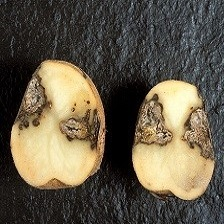

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

img=image.load_img('./../Datasets/test/Blackleg/3.jpg' ,target_size=(224,224))

img

x=image.img_to_array(img)
x

In [36]:
x=x/255 #resize the data

In [37]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[4.53960929e-05, 9.32432652e-01, 3.38710845e-02, 3.30657698e-02,
        1.06843174e-04, 3.22156295e-04, 1.56118083e-04]], dtype=float32)

In [39]:
a=np.argmax(model.predict(img_data),axis=1)
print(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
[1]
